In [1]:
import tensorflow as tf
import cv2
from tensorflow.keras.models import load_model
import numpy as np

In [2]:
model = load_model('CNN_model_Checkpoint2.keras')
classifier = cv2.CascadeClassifier("frontal_face.xml")

In [3]:
#augmentation
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [4]:
Emotion_Classes = ['Angry', 
                  'Disgust', 
                  'Fear', 
                  'Happy', 
                  'Neutral', 
                  'Sad', 
                  'Surprise']

In [6]:
webcamp = cv2.VideoCapture(0)
while True:
    r,frame = webcamp.read()
    if not r:
        print("Error:Could not read frame")
        break
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = classifier.detectMultiScale(frame,1.3,5)
    try:
        for (i,j,w,h) in faces:
            image = gray[j:j+h, i:i+w]
            cv2.rectangle(frame,(i,j),(i+w,j+h),(255,0,0),2)
            image = cv2.resize(image,(48,48))
            img = extract_features(image)
            print("Shape of img:",img.shape)
            
            pred = model.predict(img)
            print("Prediction Output:",pred)
            prediction_label = Emotion_Classes[pred.argmax()]
            cv2.putText(frame,'%s' %(prediction_label),(i-20,-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,2,(0,0,255)),Lin
        cv2.imshow("Output",frame)
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break
    except cv2.error:
        pass
webcamp.release()
cv2.destroyAllWindows()

Shape of img: (1, 48, 48, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Prediction Output: [[4.2118873e-02 3.4681088e-04 2.5265906e-02 5.9998860e-03 7.6122552e-01
  1.6055854e-01 4.4845492e-03]]
Shape of img: (1, 48, 48, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Prediction Output: [[4.1070759e-02 1.7743360e-04 2.4517447e-02 3.0033325e-03 6.7885417e-01
  2.4978834e-01 2.5884642e-03]]
Shape of img: (1, 48, 48, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Prediction Output: [[3.9585166e-02 1.4435685e-04 2.9168006e-02 2.0706286e-03 7.1332186e-01
  2.1186641e-01 3.8435494e-03]]
Shape of img: (1, 48, 48, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction Output: [[3.0119473e-02 1.2793044e-04 1.6620947e-02 3.2234823e-03 8.0578762e-01
  1.4230035e-01 1.8201458e-03]]
Shape of img: (1, 48, 48, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction Output: [[3.1241391e-02 9.7241675e-05 2.0500477e-02 3.3134609e-03 7.1802795e-01
  2.2393951e-01 2.8799779e-03]]
Shape of img: (1, 48, 48, 1)
1/1 ━━━━━━━━━━━━━━━━

In [15]:
import matplotlib.pyplot as plt
def loadFile(filename,class_name):
    image_path = cv2.imread(filename)
    gray = cv2.cvtColor(image_path,cv2.COLOR_BGR2GRAY)
    faces = classifier.detectMultiScale(gray, 1.3, 5)
    for i,j,w,h in faces:
        image = gray[j:j+h, i:i+w]
        cv2.rectangle(image_path,(i,j),(i+w,j+h),(255,0,0),2)
        plt.imshow(cv2.cvtColor(image_path,cv2.COLOR_BGR2RGB))
        image = cv2.resize(image,(48,48))
        img = extract_features(image)
        pred = model.predict(img)
        prediction_label = Emotion_Classes[pred.argmax()]
        plt.title(f'prediction_label :{prediction_label}')
        plt.axis(False);

        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


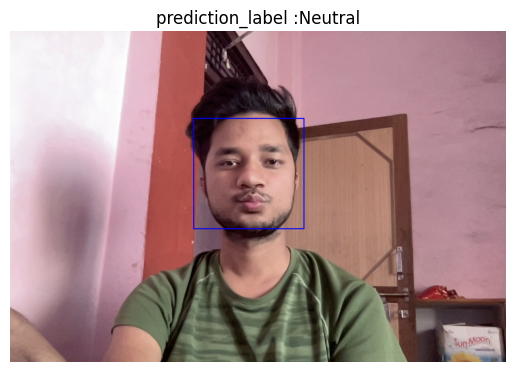

In [11]:
loadFile("milan.jpeg",Emotion_Classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


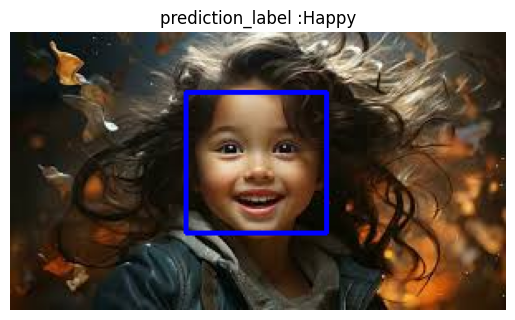

In [17]:
loadFile("happy.jpeg",Emotion_Classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


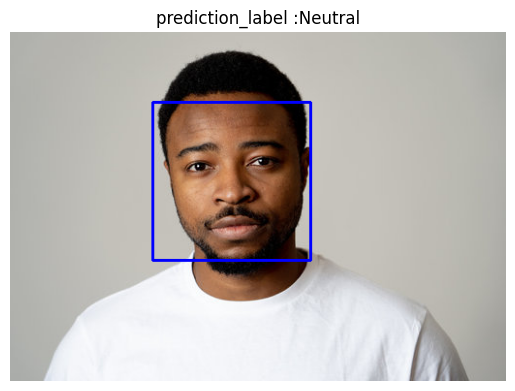

In [19]:
loadFile("neutral_image.jpeg",Emotion_Classes)